# **Convertiremos Kilometrosa a Millas**

In [1]:
import tensorflow as tf
import numpy as np

Entradas en grados Celsius

In [2]:
km = np.array([40,10,1,8,15,22,38], dtype = float)
millas = np.array([64.37,16.09,1.60,12.87,24.14,35.40,61.15,], dtype = float)


**Modelo**<br>
Creamos las capas de nuestra red neuronal



In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape =[1])
#modelo = tf.keras.Sequential([capa])

## Que pasaria si le agregamos dos capas intermedias a la red para probar su desempeño?

In [3]:
oculta1=tf.keras.layers.Dense(units=3, input_shape = [1])
oculta2 = tf.keras.layers.Dense(units= 3)
salida =  tf.keras.layers.Dense(units= 1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilamos el modelo

In [4]:
modelo.compile(
    optimizer= tf.keras.optimizers.Adam(0.1), #El Optimizador le permitira ajustar los sesgos o pesos de la entrada para mejorar sus predicciones
    loss = 'mean_squared_error'               #Parametro de perdida
)
#El optimizer le permite ajustar los sesgos para aprender y mejorar el aprendizaje,entre parentisis va la TASA DE APRENDIZAJE(0.1)

Comenzamos el entrenamiento

In [5]:
print("Comenzando el entrenamiento")
historial = modelo.fit(km, millas, epochs= 500,verbose = False)
print("Entrenamiento Concluido!!!")

Comenzando el entrenamiento
Entrenamiento Concluido!!!


Graficamos el porcentaje de perdida

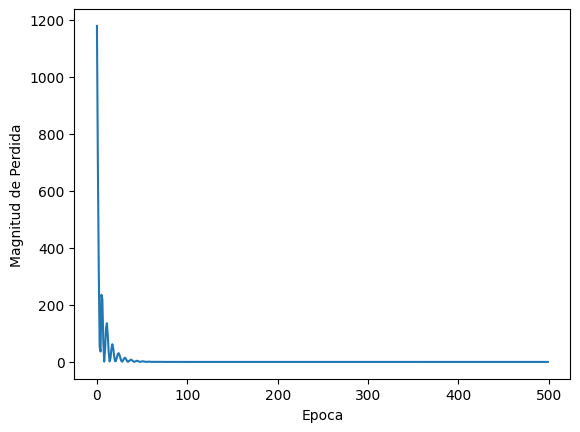

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("Epoca")
plt.ylabel("Magnitud de Perdida")
plt.plot(historial.history["loss"])

##Podemos ver que el modelo con las capas ocultas aprende mucho mas rapido

## Hacemos una prediccion y probamos el **modelo**

In [7]:
# Convertir la entrada en un arreglo de NumPy
entrada = np.array([[80.0]])  # Asegúrate de que sea 2D para modelos que esperan batches
resultado = modelo.predict(entrada)
print("El resultado es: " + str(resultado) + " Millas")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
El resultado es: [[128.74586]] Millas


## Arroja : <br> **El resultado es: [[128.74585]] **

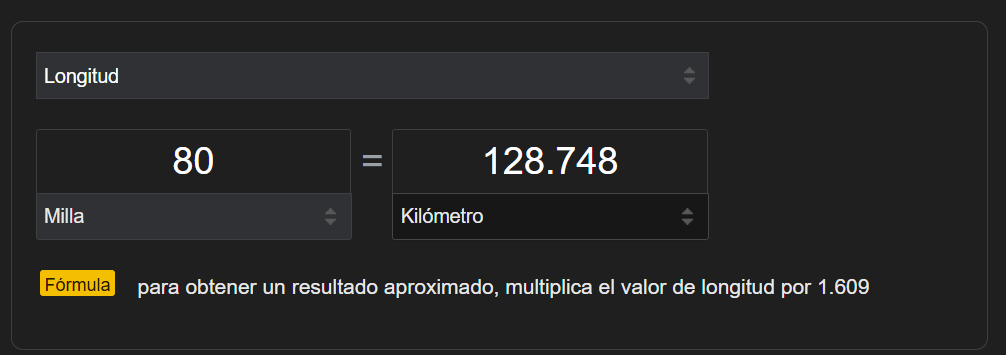

### Vemos que el modelo a pesar de ser bastante simple, es bastante preciso. Pero ahora veamos los valores internos del modelo para analizar mas detenidamente

In [ ]:
print("Variables internas del modelo: ")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo: 
[array([[-0.7548266, -0.5940099,  0.1252628]], dtype=float32), array([0.13776755, 0.16222759, 0.32957393], dtype=float32)]
[array([[-0.24997094,  1.0258025 , -0.1041604 ],
       [-0.34992102,  0.88544357,  0.23622923],
       [ 0.09347476, -0.00340747, -0.15884365]], dtype=float32), array([-0.8959989 , -0.19552332,  0.6655517 ], dtype=float32)]
[array([[ 0.1919592 ],
       [-1.170599  ],
       [-0.10338248]], dtype=float32), array([0.34734654], dtype=float32)]


## Aqui los valores son más variados y más complejos pero los resultados son mejores en términos generales

# Se guarda el modelo para luego converirlo y exportarlo

In [9]:
modelo.save('km_a_millas.h5')

In [10]:
#Reviso que se halla guardado
!ls

km_a_millas.h5	sample_data


In [11]:
#Ahora instalo tensorflowjs para convertir el modelo para poder exportarlo a la pagina web
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uni

In [12]:
#Se crea un archivo para guardar los archivos convertidos
!mkdir output_folder

In [13]:
#Realizo la exportacion
!tensorflowjs_converter --input_format keras km_a_millas.h5 output_folder

2025-01-26 01:01:52.204780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737853312.250758    5274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737853312.269142    5274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [14]:
#Listar los archivos creados
!ls output_folder

group1-shard1of1.bin  model.json
